In [30]:
import warnings   
warnings.simplefilter("ignore") 
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab
%matplotlib notebook

import sys
sys.path.append('/Users/Serene/git/Amnon/calour')
import calour as cl
import numpy as np
import pandas as pd

from scipy.stats import sem
import pickle

cl.set_log_level(40) # get rid of warnings in calour

## DME

In [35]:
with open("../results/dme_subsample_v2.pkl", "wb") as f:
    pickle.dump((ss_dme, otu_ds_dme, otu_bh_dme, err_ds_dme,err_bh_dme), f)

In [31]:
dme = cl.read_amplicon('../data/dme.biom','../data/dme.map.txt', sparse=False, filter_reads=1000, normalize=10000)
np.random.seed(31)
dme_sub1 = dme.filter_min_abundance(5)

In [32]:
dme_sub1.sample_metadata.misc_param.value_counts()

unknown              35
cesarean delivery    27
vaginal delivery     17
Name: misc_param, dtype: int64

In [33]:
np.random.seed(31)

B = 100
ss_dme = np.arange(2,18,2)

otu_bh_dme = []
otu_ds_dme = []
err_bh_dme = []
err_ds_dme = []

for i in ss_dme:
    print('subsample...: %s' %(i))
    
    ds_num = []
    bh_num = []
    for j in range(B):
        dme_sub2 = dme_sub1.downsample('misc_param', num_keep=i)
        ds = dme_sub2.diff_abundance('misc_param','cesarean delivery','vaginal delivery',fdr_method='dsfdr')
        bh = dme_sub2.diff_abundance('misc_param','cesarean delivery','vaginal delivery',fdr_method='bhfdr')

        sig_ds = len(ds.feature_metadata.index)
        sig_bh = len(bh.feature_metadata.index)

        ds_num.append(sig_ds)
        bh_num.append(sig_bh)
    
    otu_ds_dme.append(np.mean(ds_num))
    otu_bh_dme.append(np.mean(bh_num))
    
    err_ds_dme.append(sem(ds_num))  
    err_bh_dme.append(sem(bh_num))

subsample...: 2
subsample...: 4
subsample...: 6
subsample...: 8
subsample...: 10
subsample...: 12
subsample...: 14
subsample...: 16


<IPython.core.display.Javascript object>


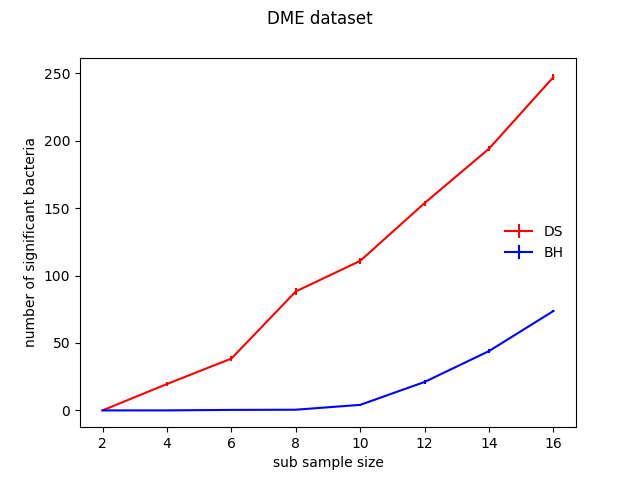

([<matplotlib.axis.XTick at 0x112194518>,
 <a list of 8 Text xticklabel objects>)

In [34]:
plt.figure()
plt.errorbar(ss_dme, otu_ds_dme, yerr=err_ds_dme, color = 'red', label = 'DS')
plt.errorbar(ss_dme, otu_bh_dme, yerr=err_bh_dme, color = 'blue', label = 'BH')
pylab.legend(loc ='center right', frameon=False)
plt.suptitle('DME dataset')
plt.xlabel('sub sample size')
plt.ylabel('number of significant bacteria')

plt.xticks(np.arange(2, 18, 2))

## UKT

In [39]:
with open("../results/ukt_subsample_v2.pkl", "wb") as f:
    pickle.dump((ss_ukt, otu_ds_ukt, otu_bh_ukt, err_ds_ukt, err_bh_ukt), f)

In [36]:
ukt = cl.read_amplicon('../data/uk_twins_otu.biom','../data/uk_twins_map.txt',sparse=False, filter_reads=1000, normalize=10000)
np.random.seed(31)
ukt_sub1 = ukt.filter_min_abundance(5)

In [37]:
np.random.seed(31)

B = 100
ss_ukt = np.arange(10,110,10)

otu_bh_ukt = []
otu_ds_ukt = []
err_bh_ukt = []
err_ds_ukt = []

for i in ss_ukt:
    print('subsample...: %s' %(i))
    
    ds_num = []
    bh_num = []
    for j in range(B):
        ukt_sub2 = ukt_sub1.downsample('bmi_cat', num_keep=i)
        ds = ukt_sub2.diff_abundance('bmi_cat','Lean','Obese',fdr_method='dsfdr')
        bh = ukt_sub2.diff_abundance('bmi_cat','Lean','Obese',fdr_method='bhfdr')

        sig_ds = len(ds.feature_metadata.index)
        sig_bh = len(bh.feature_metadata.index)

        ds_num.append(sig_ds)
        bh_num.append(sig_bh)
    
    otu_ds_ukt.append(np.mean(ds_num))
    otu_bh_ukt.append(np.mean(bh_num))
    
    err_ds_ukt.append(sem(ds_num))  
    err_bh_ukt.append(sem(bh_num))

subsample...: 10
subsample...: 20
subsample...: 30
subsample...: 40
subsample...: 50
subsample...: 60
subsample...: 70
subsample...: 80
subsample...: 90
subsample...: 100


<IPython.core.display.Javascript object>


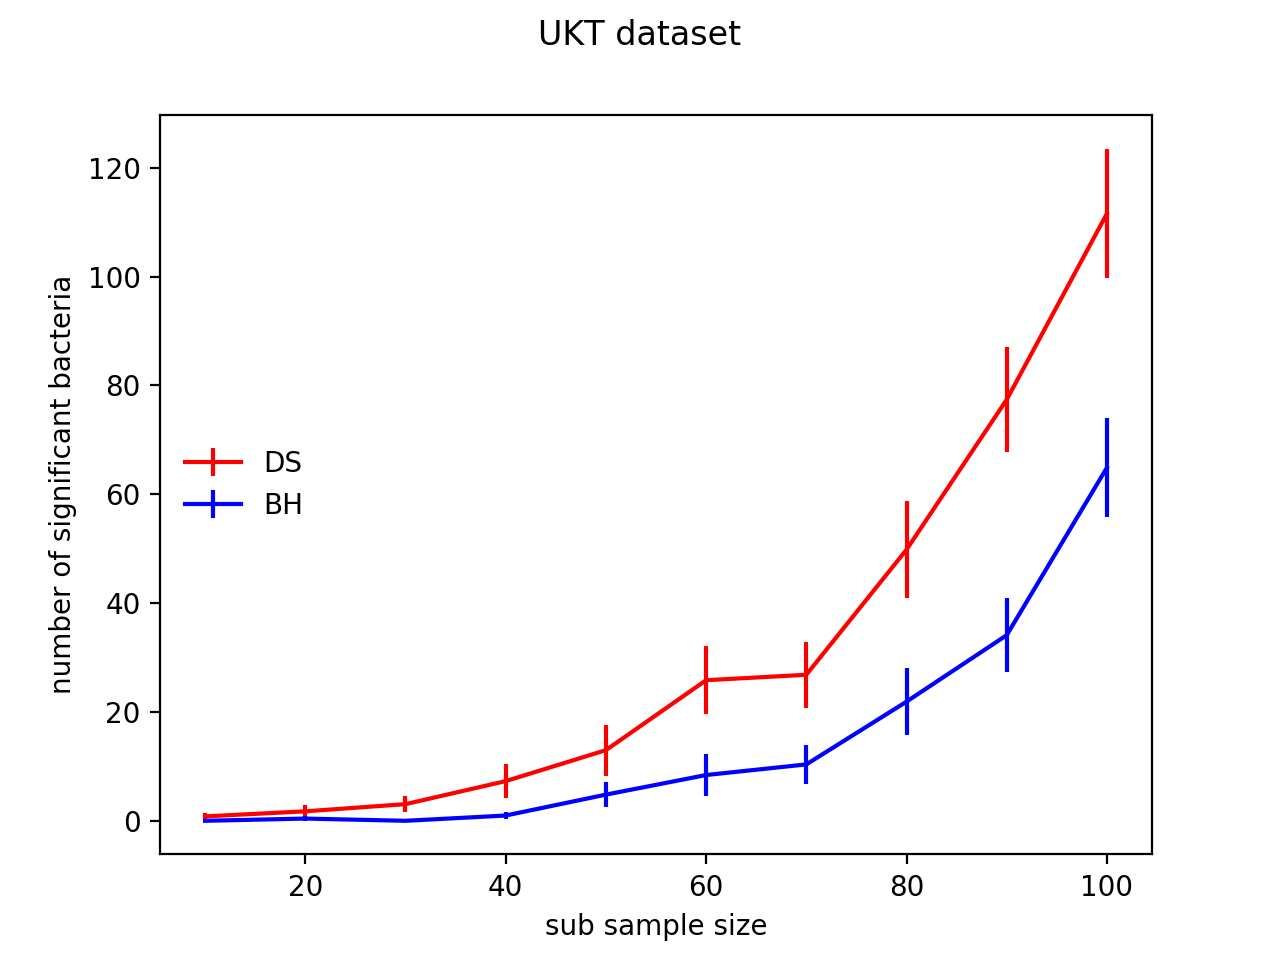

In [40]:
plt.figure()
plt.errorbar(ss_ukt, otu_ds_ukt, yerr=err_ds_ukt, color = 'red', label='DS')
plt.errorbar(ss_ukt, otu_bh_ukt, yerr=err_bh_ukt, color = 'blue', label='BH')
pylab.legend(loc ='center left', frameon=False)
plt.suptitle('UKT dataset')
plt.xlabel('sub sample size')
plt.ylabel('number of significant bacteria')

## DIBD

In [43]:
with open("../results/dibd_subsample_v2.pkl", "wb") as f:
    pickle.dump((ss_dibd, otu_ds_dibd, otu_bh_dibd, err_ds_dibd, err_bh_dibd), f)

In [41]:
dibd = cl.read_amplicon('../data/dibd.biom','../data/dibd.map.txt', sparse=False, filter_reads=1000, normalize=10000)
np.random.seed(31)
dibd_sub1 = dibd.filter_min_abundance(5)

In [42]:
np.random.seed(31)

B = 100
ss_dibd = np.arange(5,70,5)

otu_bh_dibd = []
otu_ds_dibd = []
err_bh_dibd = []
err_ds_dibd = []

for i in ss_dibd:
    print('subsample...: %s' %(i))
    
    ds_num = []
    bh_num = []
    for j in range(B):
        dibd_sub2 = dibd_sub1.downsample('disease_stat', num_keep=i)
        ds = dibd_sub2.diff_abundance('disease_stat','IBD','healthy',fdr_method='dsfdr')
        bh = dibd_sub2.diff_abundance('disease_stat','IBD','healthy',fdr_method='bhfdr')

        sig_ds = len(ds.feature_metadata.index)
        sig_bh = len(bh.feature_metadata.index)

        ds_num.append(sig_ds)
        bh_num.append(sig_bh)
    
    otu_ds_dibd.append(np.mean(ds_num))
    otu_bh_dibd.append(np.mean(bh_num))
    
    err_ds_dibd.append(sem(ds_num))  
    err_bh_dibd.append(sem(bh_num))

subsample...: 5
subsample...: 10
subsample...: 15
subsample...: 20
subsample...: 25
subsample...: 30
subsample...: 35
subsample...: 40
subsample...: 45
subsample...: 50
subsample...: 55
subsample...: 60
subsample...: 65


<IPython.core.display.Javascript object>


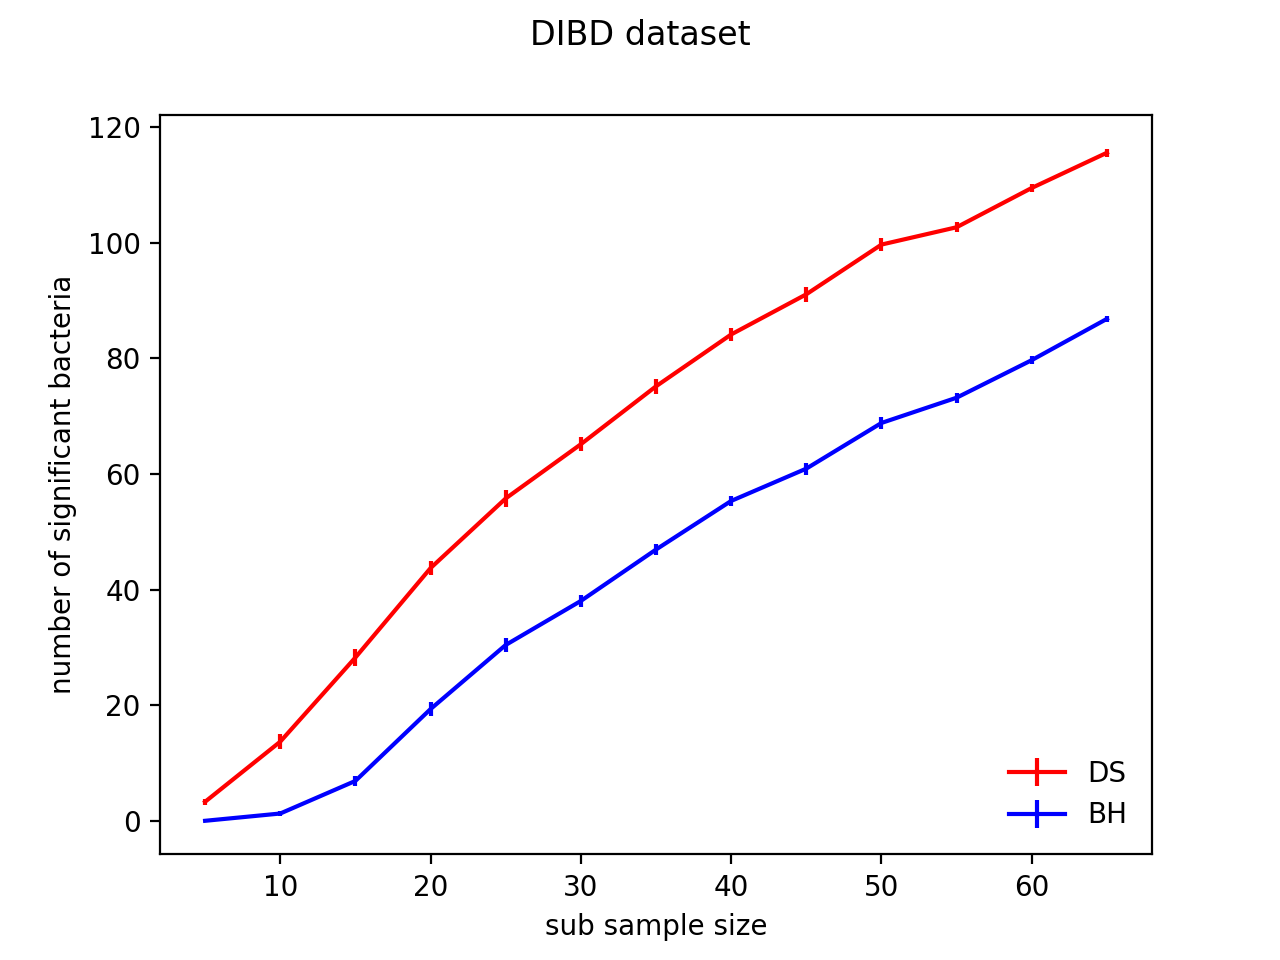

In [44]:
plt.figure()
plt.errorbar(ss_dibd, otu_ds_dibd, yerr=err_ds_dibd, color = 'red', label='DS')
plt.errorbar(ss_dibd, otu_bh_dibd, yerr=err_bh_dibd, color = 'blue', label='BH')
pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('DIBD dataset')
plt.xlabel('sub sample size')
plt.ylabel('number of significant bacteria')

## GCD

In [48]:
with open("../results/gcd_subsample_v2.pkl", "wb") as f:
    pickle.dump((ss_gcd, otu_ds_gcd, otu_bh_gcd, err_ds_gcd, err_bh_gcd), f)

In [45]:
gcd = cl.read_amplicon('../data/gcd.biom','../data/gcd.map.txt', sparse=False, filter_reads=1000, normalize=10000)
np.random.seed(31)
gcd_sub1 = gcd.filter_min_abundance(5)

In [46]:
np.random.seed(31)

B = 100
ss_gcd = np.arange(20,340,20)

otu_bh_gcd = []
otu_ds_gcd = []
err_bh_gcd = []
err_ds_gcd = []

for i in ss_gcd:
    print('subsample...: %s' %(i))
    
    ds_num = []
    bh_num = []
    for j in range(B):
        gcd_sub2 = gcd_sub1.downsample('diagnosis', num_keep=i)
        ds = gcd_sub2.diff_abundance('diagnosis', 'CD', 'no',fdr_method='dsfdr')
        bh = gcd_sub2.diff_abundance('diagnosis', 'CD', 'no',fdr_method='bhfdr')

        sig_ds = len(ds.feature_metadata.index)
        sig_bh = len(bh.feature_metadata.index)

        ds_num.append(sig_ds)
        bh_num.append(sig_bh)
    
    otu_ds_gcd.append(np.mean(ds_num))
    otu_bh_gcd.append(np.mean(bh_num))
    
    err_ds_gcd.append(sem(ds_num))  
    err_bh_gcd.append(sem(bh_num))

subsample...: 20
subsample...: 40
subsample...: 60
subsample...: 80
subsample...: 100
subsample...: 120
subsample...: 140
subsample...: 160
subsample...: 180
subsample...: 200
subsample...: 220
subsample...: 240
subsample...: 260
subsample...: 280
subsample...: 300
subsample...: 320


<IPython.core.display.Javascript object>


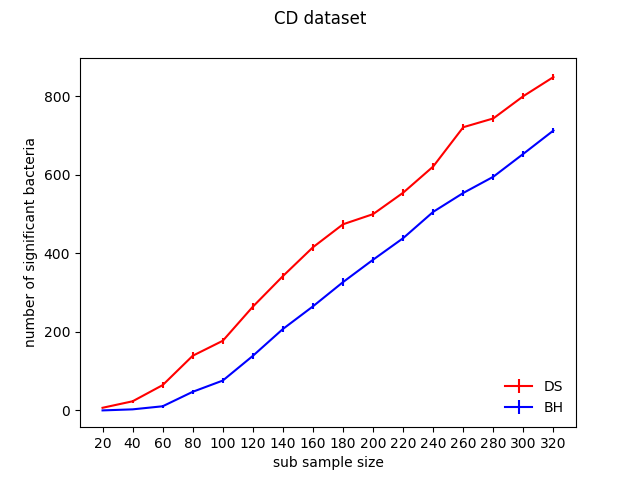

([<matplotlib.axis.XTick at 0x112624128>,
 <a list of 16 Text xticklabel objects>)

In [47]:
plt.figure()
plt.errorbar(ss_gcd, otu_ds_gcd, yerr=err_ds_gcd, color = 'red', label='DS')
plt.errorbar(ss_gcd, otu_bh_gcd, yerr=err_bh_gcd, color = 'blue', label='BH')
pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('CD dataset')
plt.xlabel('sub sample size')
plt.ylabel('number of significant bacteria')
plt.xticks(np.arange(20, 340,20))

## American Gut

In [49]:
ag = cl.read_amplicon('../data/ag.biom','../data/ag_fecals.map.txt',sparse=False, filter_reads=1000, normalize=10000)
np.random.seed(31)
ag_sub1 = ag.filter_min_abundance(5) 

## Antibiotic history

In [52]:
with open("../results/aga_subsample_v2.pkl", "wb") as f:
    pickle.dump((ss_aga, otu_ds_aga, otu_bh_aga, err_ds_aga, err_bh_aga), f)

In [50]:
np.random.seed(31)

B = 100
ss_aga = np.arange(20,180,20)

otu_bh_aga = []
otu_ds_aga = []
err_bh_aga = []
err_ds_aga = []

for i in ss_aga:
    print('subsample...: %s' %(i))
    
    ds_num = []
    bh_num = []
    for j in range(B):
        ag_sub2 = ag_sub1.downsample('ANTIBIOTIC_HISTORY', num_keep=i)
        ds = ag_sub2.diff_abundance('ANTIBIOTIC_HISTORY','I have not taken antibiotics in the past year.',
                                'Week',fdr_method='dsfdr')
        bh = ag_sub2.diff_abundance('ANTIBIOTIC_HISTORY','I have not taken antibiotics in the past year.',
                                'Week',fdr_method='bhfdr')

        sig_ds = len(ds.feature_metadata.index)
        sig_bh = len(bh.feature_metadata.index)

        ds_num.append(sig_ds)
        bh_num.append(sig_bh)
    
    otu_ds_aga.append(np.mean(ds_num))
    otu_bh_aga.append(np.mean(bh_num))
    
    err_ds_aga.append(sem(ds_num))  
    err_bh_aga.append(sem(bh_num))

subsample...: 20
subsample...: 40
subsample...: 60
subsample...: 80
subsample...: 100
subsample...: 120
subsample...: 140
subsample...: 160


<IPython.core.display.Javascript object>


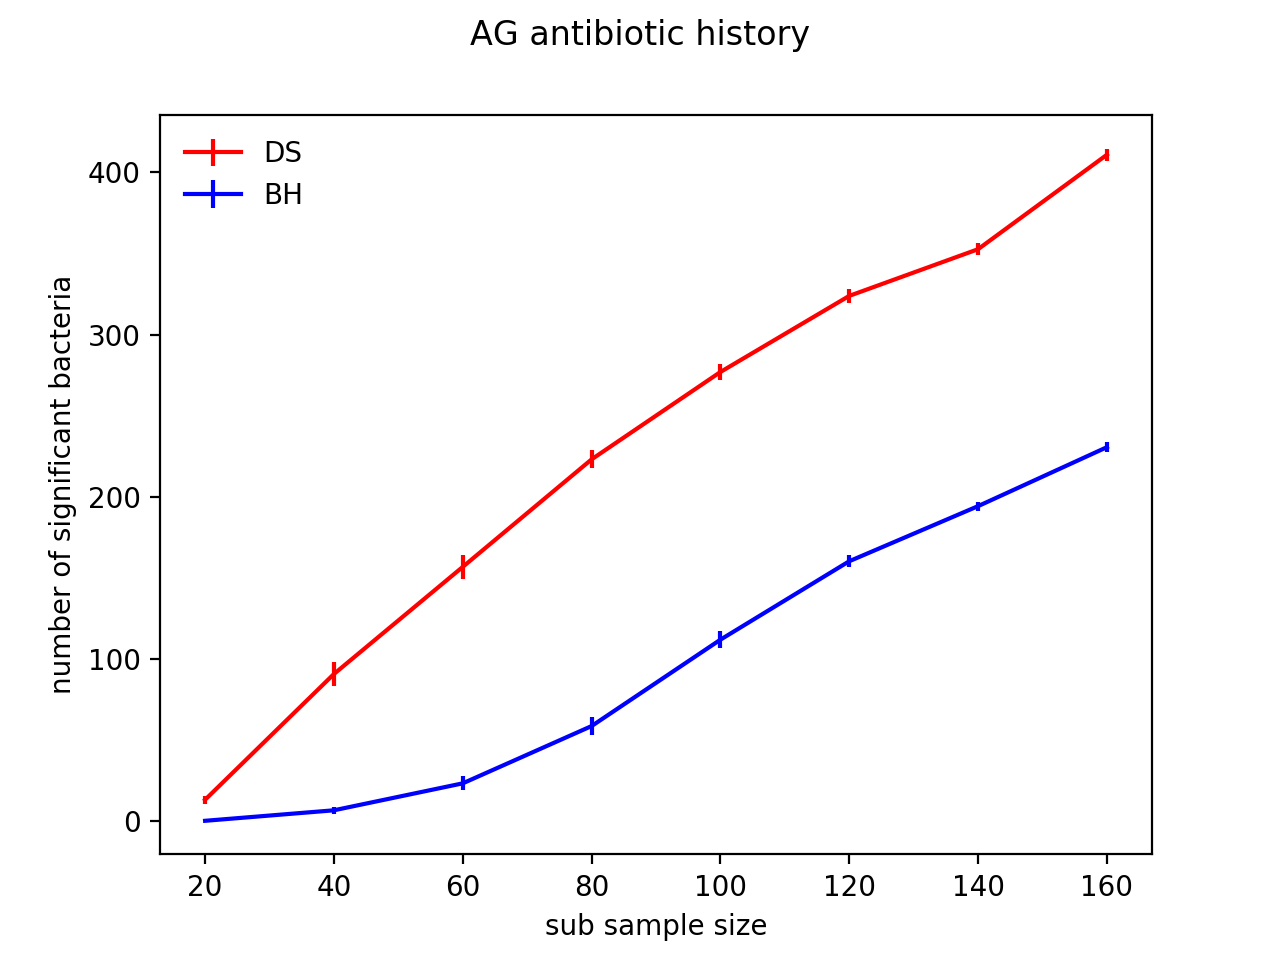

In [53]:
plt.figure()
plt.errorbar(ss_aga, otu_ds_aga, yerr=err_ds_aga, color = 'red', label='DS')
plt.errorbar(ss_aga, otu_bh_aga, yerr=err_bh_aga, color = 'blue', label='BH')
pylab.legend(loc = 'upper left', frameon=False)
plt.suptitle('AG antibiotic history')
plt.xlabel('sub sample size')
plt.ylabel('number of significant bacteria')

# plants numbers

In [54]:
with open("../results/agp_subsample_v2.pkl", "wb") as f:
    pickle.dump((ss_agp, otu_ds_agp, otu_bh_agp, err_ds_agp, err_bh_agp), f)

In [51]:
np.random.seed(31)

B = 100
ss_agp = np.arange(50,400,50)

otu_bh_agp = []
otu_ds_agp = []
err_bh_agp = []
err_ds_agp = []

for i in ss_agp:
    print('subsample...: %s' %(i))
    
    ds_num = []
    bh_num = []
    for j in range(B):
        ag_sub2 = ag_sub1.downsample('TYPES_OF_PLANTS', num_keep=i)
        ds = ag_sub2.diff_abundance('TYPES_OF_PLANTS','More than 30','Less than 5',fdr_method='dsfdr')
        bh = ag_sub2.diff_abundance('TYPES_OF_PLANTS','More than 30','Less than 5',fdr_method='bhfdr')

        sig_ds = len(ds.feature_metadata.index)
        sig_bh = len(bh.feature_metadata.index)

        ds_num.append(sig_ds)
        bh_num.append(sig_bh)
    
    otu_ds_agp.append(np.mean(ds_num))
    otu_bh_agp.append(np.mean(bh_num))
    
    err_ds_agp.append(sem(ds_num))  
    err_bh_agp.append(sem(bh_num))

subsample...: 50
subsample...: 100
subsample...: 150
subsample...: 200
subsample...: 250
subsample...: 300
subsample...: 350


<IPython.core.display.Javascript object>


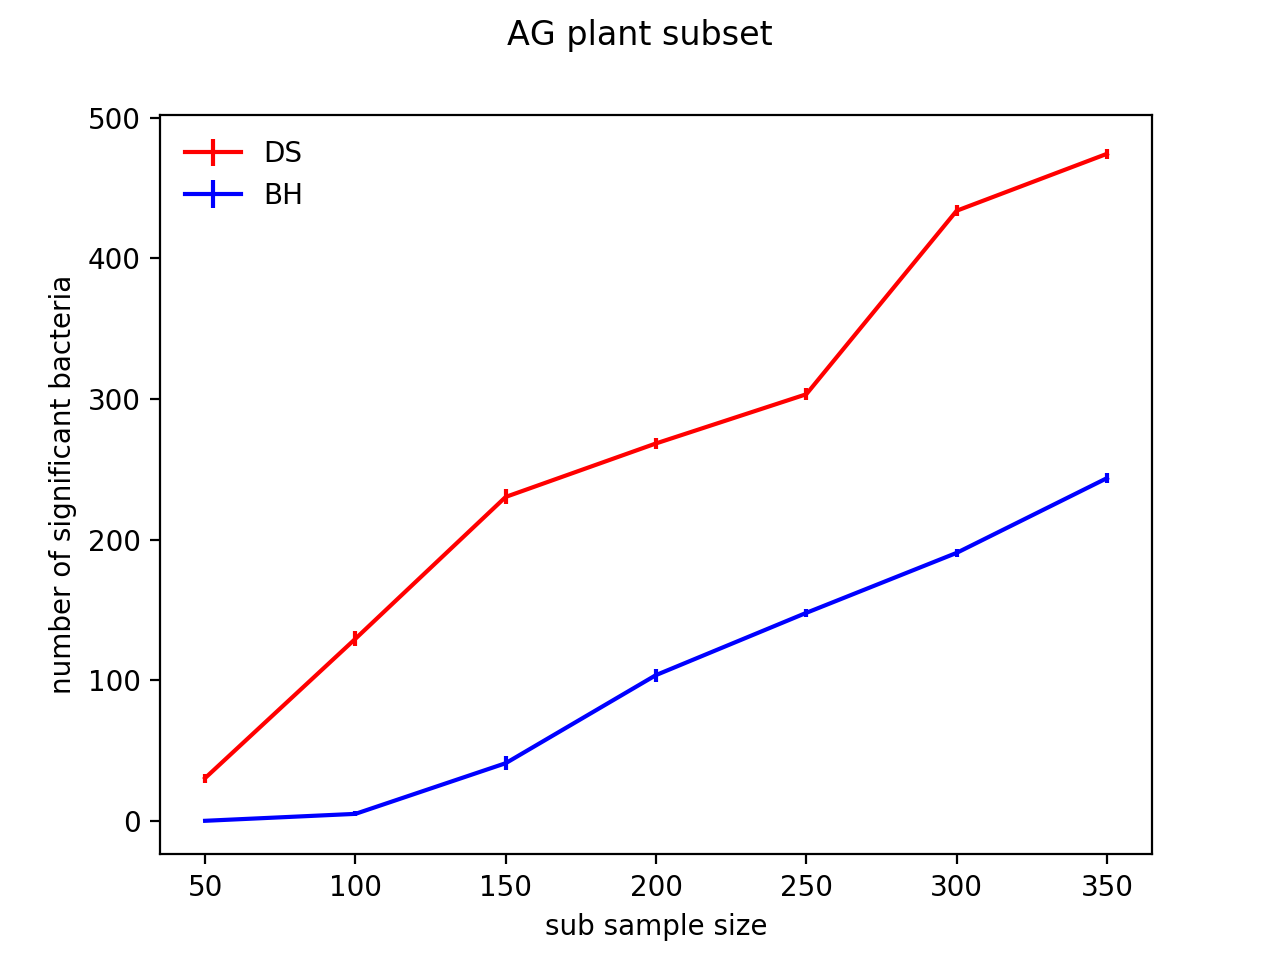

In [55]:
plt.figure()
plt.errorbar(ss_agp, otu_ds_agp, yerr=err_ds_agp, color = 'red', label='DS')
plt.errorbar(ss_agp, otu_bh_agp, yerr=err_bh_agp, color = 'blue', label='BH')
pylab.legend(loc = 'upper left', frameon=False)
plt.suptitle('AG plant subset')
plt.xlabel('sub sample size')
plt.ylabel('number of significant bacteria')